# Analysis of Global Video Game Sales: Trends, Patterns, and Insights for 2017 Marketing Strategy

## Project Description:

This project analyzes global video game sales data to uncover patterns and trends that can inform marketing strategies for 2017. The analysis focuses on identifying leading platforms, popular genres, and regional user preferences. It evaluates the impact of user and professional reviews on sales, examines sales dynamics across different platforms, and investigates how ESRB ratings influence regional markets. The findings provide insights into profitable platforms and genres while offering data-driven recommendations for campaign planning and market targeting.

### Loading data and preliminary data observation

In [1]:
# Importing packages and libraries

import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

In [2]:
# loading the data
df_games = pd.read_csv('/datasets/games.csv')
# inspecting data structure.
df_games.head(10)
df_games.info()

print(df_games.isnull().sum())
df_games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
R

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Data preparation

In [3]:
# Make all column names lowercase for consistency.
df_games.columns = df_games.columns.str.lower()

# Convert the year_of_release column to integers
# Handle missing values (optional: drop or fill with a placeholder)
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)             # Replace NaN with 0 as a placeholder
df_games = df_games[df_games['year_of_release'] != 0]
# Convert the column to integers
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
# Verify the conversion
print(df_games['year_of_release'].dtypes)
# filtering erronous data
filtered_rows = df_games[((df_games['platform'] == 'DS') & (df_games['year_of_release'] > 0) & (df_games['year_of_release'] < 2004))]
print(filtered_rows)
df_games = df_games[~((df_games['platform'] == 'DS') & (df_games['year_of_release'] > 0) & (df_games['year_of_release'] < 2004))]

int64
                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
15957       0.0       0.0      0.02          0.0           NaN        NaN   

      rating  
15957    NaN  


In [4]:
# Check if missing values in 'name' and 'genre' are correlated
if df_games['name'].isnull().equals(df_games['genre'].isnull()):
    print("Missing values are perfectly correlated.")
else:
    print("Missing values are not perfectly correlated.")

# Remove rows where 'name' is missing
df_games = df_games.dropna(subset=['name'])

# Verify if there are any remaining missing values in the 'name' column
print(df_games['name'].isnull().sum())

Missing values are perfectly correlated.
0


In [5]:
# Checking percentage of missing values
critic_missing= df_games['critic_score'].isna().mean() * 100
print(f"Missing percetage in 'critic_score' column: {critic_missing:.2f}%")

user_missing= df_games['user_score'].isna().mean() * 100
print(f"Missing percetage in 'user_score' column: {user_missing:.2f}%")

Missing percetage in 'critic_score' column: 51.45%
Missing percetage in 'user_score' column: 40.16%


In [6]:
# Fill missing values in 'critic_score' with the 0 and assign back to the column. This method will allow missing rating to be excluded from statistic
df_games['critic_score'] = df_games['critic_score'].fillna(0) #df_games['critic_score'].median()

# Verify if there are still missing values 
print(df_games['critic_score'].isnull().sum())

0


In [7]:
#Replace "TBD" in user_score with NaN and convert the column to numeric
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
# FIll missing values in 'user_score' with o and assign back to column.
df_games['user_score'] = df_games['user_score'].fillna(0) #df_games['user_score'].median()

In [8]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [9]:
# Handeling missing values in Rating column

# Checking percentage of missing values
missing_percentage= df_games['rating'].isna().mean() * 100
print(f"Missing percetage in 'rating' column: {missing_percentage:.2f}%")

# leaving missing values as is and replace NaN with 'Unrated' category for visualization
df_games['rating'] = df_games['rating'].fillna('Unrated')

Missing percetage in 'rating' column: 40.59%


**Explanation of data issues and handeling of missing data.**

Critic_score and User_score columns:

In the critic-score column, 51% of the data is missing and because this can impact analysis, it was best to replace missing values with Zeros for easy data handeling and manipulation. The same thing can be said about user_score colum was well with 40% data missing. 

The missing values could be possible if the games released never really took off in sales, or the game release was not offered on blockbuster since blockbuster games tend to have alot more reviews by critics and users. 

Rating column: 

The column correspond to ESRB rating (e.g., E,T,M), which represent age appropriateness. Missing values could've occur because"
1. The game has been rated yet (e.g., a new game).
2. The game doesn't require rating such as niche markets or indie games.

Because 40% of the data in 'rating' column are missing, it was best to leave the column as is instead of formulating contextual assumption about 40% of missing data. The missing values were replace with 'Unrated' for visualization purposes.

### Analysis of the data

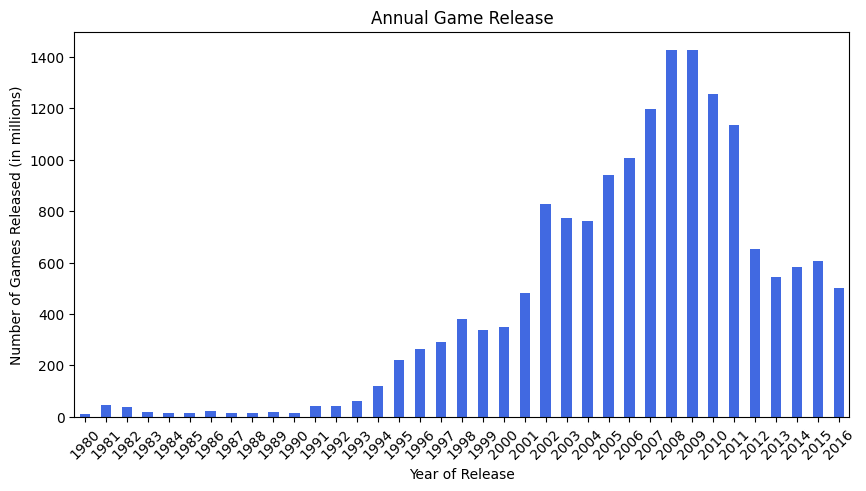

In [10]:
# Analyze # of games released per year
yearly_release = df_games.groupby('year_of_release')['name'].count()
yearly_release.plot(kind='bar', 
                    xlabel='Year of Release',
                    ylabel='Number of Games Released (in millions)',
                    color='royalblue',
                    figsize=[10,5],
                    rot= 45)
plt.title('Annual Game Release')
plt.show()

In the initial period (1980-1994), video games release were sparse, with fewer than 200 games per year. This reflect the early stages of video game industry, with limited platforms and smaller markets. During the growth phase (1995-2007), a stead rise in game release is observed arround 1995. This period marks the expansion of the industry, with introduction to popular platforms suchas Playstation, Nintendo 64, and early gen Xbox. Game release peaked between 2007 and 2008, with over 1,400 games released annually. In the decline phase (2009-2016), there is a noticable decline in number of games released. By 2016, the number of release annully is dramatically low, hovering arround 400-600. This decline could be explained by market saturation, a shift in focus to higher-quality, big-budget games rather than quantity. Growth in mobile games might not be well represented in traditional dataset but could've played impact in game release decline. It's also import to note that the drop in 2016 could partially reflect incomplete data collection for the year, as suggested in the project description.

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


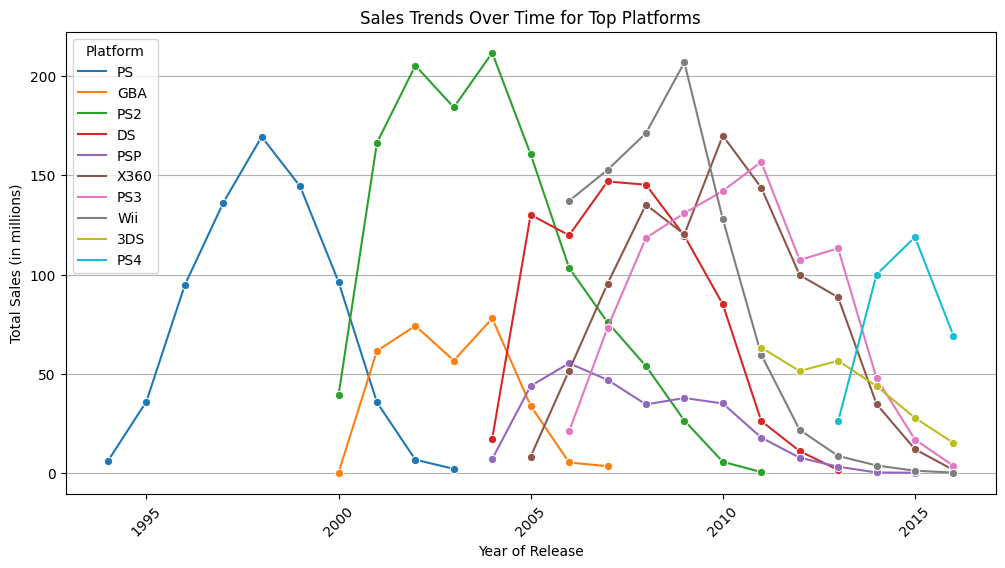

In [11]:

# calculate total sales per plaform
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# Display top 10 platform. this give us the platforms with highest total sales
print(platform_sales.head(10))

# Selecting the top platform based on sales
top_platforms = platform_sales.head(10).index

# Filter data only the top platform
top_platforms_data = df_games[df_games['platform'].isin(top_platforms)]
platform_trend = top_platforms_data.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
# Plot sales trend
platform_trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=platform_trend, x='year_of_release', y='total_sales',hue='platform', marker='o')
plt.title('Sales Trends Over Time for Top Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(axis='y')
plt.show()




Older platforms such as PS (PlayStation) and GBA (Game Boy Advance) have peaked in earlier years (1995–2005) and then declined, which is typical of platforms being phased out as new technology becomes available. Platforms like PS2, X360, and Wii show a rise in sales after their release, peaking in the mid-2000s and then declining as they were replaced by newer platforms. PS4, being a newer platform (launched in 2013), shows growth in recent years (2014–2015), as expected. PSP, DS, and 3DS have relatively short lifespans, with steep rises and falls, reflecting the competitive handheld console market. PS2 stands out with significantly higher sales during its peak years, indicating its dominance during that era.

Key Takeaways:
Platforms follow a clear lifecycle: introduction, growth, maturity, and decline.Sales trends can guide advertising campaigns, focusing on platforms in their growth or maturity phases (e.g., PS4 during this time period). The decline of older platforms like PS2 and Wii suggests a shift in market focus toward newer generations.

In [12]:
# Platforms that Used to Be Popular but Now Have Zero Sales?

# Identify platforms with sales earlier years but zero in the most recent years
popular_zero = platform_trend[(platform_trend['year_of_release'] < 2016) &
                                         (platform_trend['platform'].isin(platform_trend[platform_trend['year_of_release'] == 2016]['platform'].unique())== False)]
print("Platforms that were once popular but now have zero sales:")
print(popular_zero['platform'].unique())

Platforms that were once popular but now have zero sales:
['PS' 'GBA' 'PS2' 'DS' 'PSP']


In [13]:
#How Long Does It Take for New Platforms to Appear and Old Ones to Fade?

# Calculate platform lifespan (first year to last year with sales)
platform_lifespan = platform_trend.groupby('platform')['year_of_release'].agg(['min','max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
#Displaying lifespan data
print(platform_lifespan)

# calculate average lifespan
average_lifespan = platform_lifespan['lifespan'].mean()

# Calculate gaps between the introduction of platforms
platform_appearance = platform_trend.groupby('platform')['year_of_release'].min().sort_values()
average_gap = platform_appearance.diff().mean()

print()
print(f"Average platform lifespan: {average_lifespan:.1f} years\n")
print(f"Average gap between new platforms: {average_gap:.1f} years")

           min   max  lifespan
platform                      
3DS       2011  2016         5
DS        2004  2013         9
GBA       2000  2007         7
PS        1994  2003         9
PS2       2000  2011        11
PS3       2006  2016        10
PS4       2013  2016         3
PSP       2004  2015        11
Wii       2006  2016        10
X360      2005  2016        11

Average platform lifespan: 8.6 years

Average gap between new platforms: 2.1 years


**Filter the dataset to include only games released from 2011 onward:**

Based on the chart of annual game releases, significant releases started in the late 1990s, peaking around 2008–2010.In recent years, the number of releases declined, but trends for current platforms (PS4, Xbox One, etc.) are still relevant.Analysis of platform trends shows most platforms have a lifespan of 8-9 years. To predict 2017 trends, we need data on platforms that are active or were recently active. Gaps between new platform introductions are approximately 2 years. Older platforms fading out may no longer be relevant for 2017 predictions. The period 2011–2016 provides the most relevant and recent data to build a predictive model for 2017

In [14]:
# Filter the dataset to include only games released from 2011 onward
relevant_data = df_games[df_games['year_of_release']>= 2011]

#Verify the filtered data
print(relevant_data['year_of_release'].min())
print(relevant_data['year_of_release'].max())

relevant_data

2011
2016


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,Unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,Unrated,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Unrated,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,Unrated,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,Unrated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Unrated,0.01


platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64


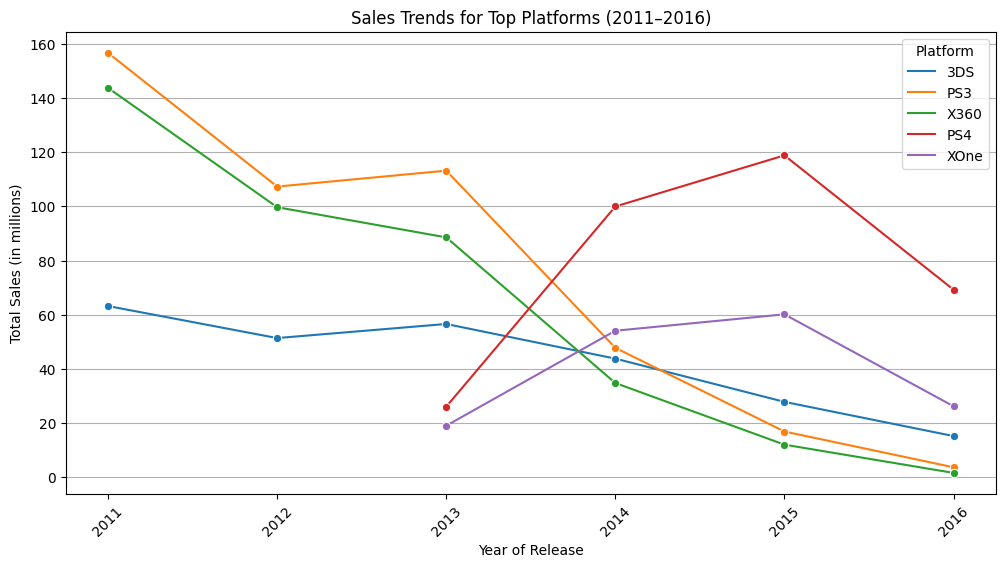

In [15]:
# Filter platform leading in sales by sorting
lead_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Display leading platforms
print(lead_sales)
# Plot trends for the top platform
top_relevant = lead_sales.head(5).index

#Analyze sales trends for each platform over the years
top_relevant_platform = relevant_data[relevant_data['platform'].isin(top_relevant)]
relevant_trend = top_relevant_platform.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

# Plot sales 
plt.figure(figsize=(12, 6))
sns.lineplot(data=relevant_trend, x='year_of_release', y='total_sales',hue='platform', marker='o')
plt.title('Sales Trends for Top Platforms (2011–2016)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(axis='y')
plt.show()


Platform like PS4 are likely to show increasing sales trends due to being newer platforms in this timeframe. On the other hand, platform like PS3, Xbox 360, and Wii may show declining dales as they approach the end of their lifecycle. Potentially profitable platforms may include selecting platform with high total sales in the recent years and a clear growth trends such as PS4 and XBox one.

<Figure size 1200x600 with 0 Axes>

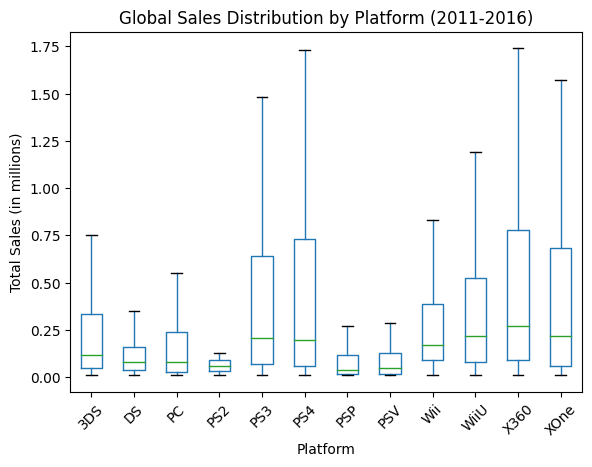

In [16]:
# creating boc plot for total sales by platform
plt.figure(figsize=(12,6))
relevant_data.boxplot( column='total_sales', by='platform', grid=False, showfliers=False)
plt.title('Global Sales Distribution by Platform (2011-2016)')
plt.suptitle('')  # Remove the automatic title generated by Pandas
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)

plt.show()

Sales Distribution: 
Platforms with a wide interquartile range (IQR) like PS4, X360, and Xbox one, likely have a diverse sales due to large variation which might indicate some lower-performance titles. Likewise, platforms with narrow IQR, like Wii U, PS vita, might have consistent but lower sales.

Outlier:
The outlier in the plot likely indicate top-selling games. These plaforms drive sales on platforms such as Xbox One, PS4, and Xbox 360. 

Average Sales:
Platforms with a higher median line in the box plot suggest higher average sales.Newer platforms like PS4 and Xbox One are expected to have higher average sales compared to older or declining platforms like PS3 and Wii. Interesetingly, PS3 and PS4 average same sales likely due to some games availalbe on PS3 could be played on PS4. 

Platforms like PS4 and Xbox One likely have significantly higher sales distributions compared to older platforms. Platforms like Wii U and PS Vita will show much lower median sales, confirming their limited success in the market and market decline.Platforms with larger box heights (wider IQR) and higher medians represent platforms with a strong game market and potential profitability.Platforms nearing the end of their lifecycle, like Xbox 360, show reduced average sales.

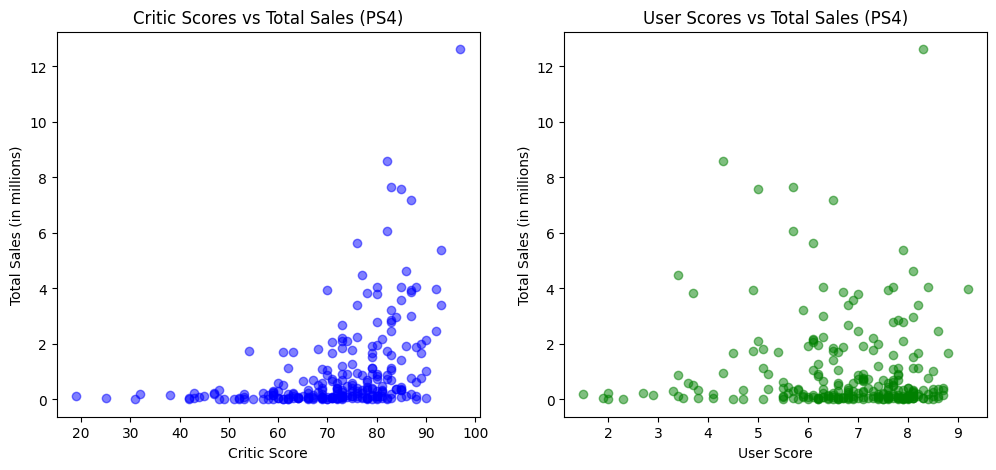

In [17]:


#Filtered data for PS4 and remove zero from critic score

ps4_data = relevant_data[(relevant_data['platform'] == 'PS4') & (relevant_data['critic_score'] !=0) & (relevant_data['user_score'] !=0)]

# Scatter plot: Critic Scores vs. Total Sales
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(ps4_data['critic_score'],ps4_data['total_sales'], alpha=0.5,color='blue')
plt.title('Critic Scores vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot: User Scores vs. Total Sales
plt.subplot(1,2,2)
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5, color='green')
plt.title('User Scores vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

plt.show()




In [18]:
# Calculate the correlation between reviews and sales.

critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f"Correlation between Critic Score and Total Sales (PS4): {critic_corr:.2f}")
print(f"Correlation between User Score and Total Sales (PS4): {user_corr:.2f}")

Correlation between Critic Score and Total Sales (PS4): 0.41
Correlation between User Score and Total Sales (PS4): -0.03


In [19]:
# Compare same games across platforms
same_games = relevant_data[relevant_data['name'].isin(ps4_data['name'])]
comparison = same_games.groupby(['name','platform'])['total_sales'].sum().unstack()

comparison

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
7 Days to Die,NaN,NaN,NaN,NaN,0.14,NaN,NaN,NaN,NaN,NaN,0.05
Aegis of Earth: Protonovus Assault,NaN,NaN,NaN,0.02,0.02,NaN,0.03,NaN,NaN,NaN,NaN
Agatha Christie's The ABC Murders,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,0.01
Alien: Isolation,NaN,NaN,0.15,0.33,1.12,NaN,NaN,NaN,NaN,0.27,0.50
Angry Birds Star Wars,0.33,NaN,NaN,0.29,0.22,NaN,0.08,0.26,0.1,0.28,0.17
...,...,...,...,...,...,...,...,...,...,...,...
World of Final Fantasy,NaN,NaN,NaN,NaN,0.34,NaN,0.21,NaN,NaN,NaN,NaN
Worms: WMD,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,0.01
XCOM 2,NaN,NaN,0.23,NaN,0.14,NaN,NaN,NaN,NaN,NaN,0.04


Critic_score scatter plot show a positive  correlation, suggesting that higher critic scores often lead to higher sales this is confirmed with positive moderate correlation of 0.41.Blockbuster titles tend to receive high critic scores and drive sales. On the other hand, user score correlation is weak suggesting that user opnion might be more subjective this verified with weak negative correlation of -0.03.  Sales across platforms suggest that PS4 versions tends to outsel other  due to its larger user base and better market performance during 2011–2016.

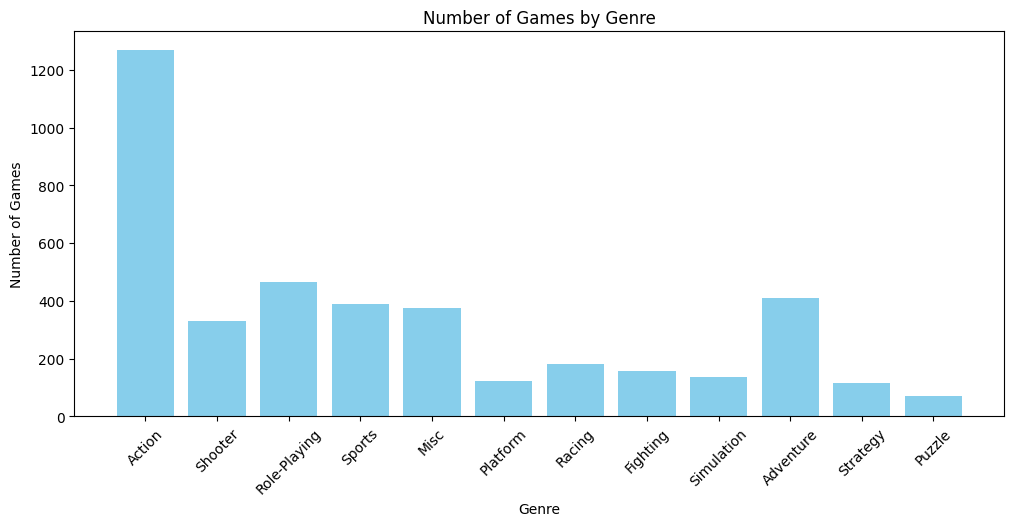

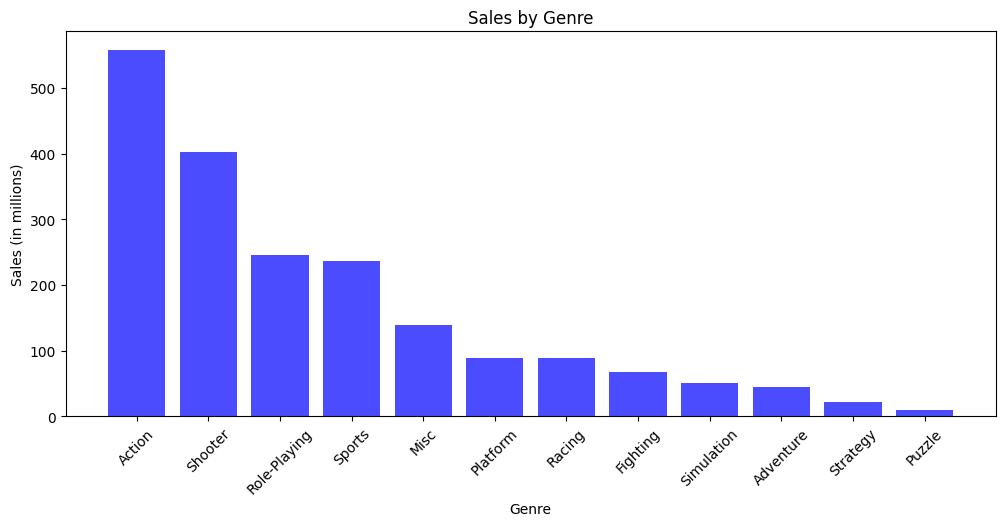

              total_sales  average_sales  game_count
genre                                               
Action             557.80       0.439559        1269
Shooter            402.91       1.224650         329
Role-Playing       245.63       0.528237         465
Sports             237.15       0.609640         389
Misc               139.42       0.371787         375
Platform            88.68       0.726885         122
Racing              88.31       0.490611         180
Fighting            66.90       0.420755         159
Simulation          50.26       0.369559         136
Adventure           45.04       0.109854         410
Strategy            22.16       0.189402         117
Puzzle               9.85       0.138732          71


In [20]:
# Analyze Genre Distribution
# Group data by genre
genere_distributon = relevant_data.groupby('genre').agg(
    total_sales = ('total_sales','sum'),
    average_sales = ('total_sales','mean'),
    game_count = ('name', 'count')  
).sort_values(by='total_sales', ascending=False)


# Bar plot: Number of games per genre

plt.figure(figsize=(12,5))
plt.bar(genere_distributon.index,genere_distributon['game_count'], color='skyblue')
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

# Bar plot: Total and average sales by genre
plt.figure(figsize=(12,5))
plt.bar(genere_distributon.index, genere_distributon['total_sales'], color='blue', alpha=0.7, label='Total Sales')
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Display data
print(genere_distributon)

As it can be seen, certain genres such as Action, and Sports typically dominate in the number of games released. These genres appeal to broad audiences and are supported by frequent releases. In the other hand, niche generes such as Puzzle or Strategy have fewer games release but often service dedicated player. 

Action, Sports, and Shooter genres typically generate the highest total sales. These genres include popular franchises and blockbuster titles. Shooter and Role-Playing games often have higher average sales per game. These genres are supported by loyal fan bases, immersive gameplay, and high production quality. 

Genres like Puzzle or Adventure may show lower total sales. This could be due to their niche appeal or lower production budgets.

Generalization:
High-Sales Genres: Often feature action-packed, immersive gameplay and strong brand recognition. Examples: Call of Duty (Shooter) or FIFA (Sports).
Low-Sales Genres: Often focus on creativity or unique mechanics and cater to smaller audiences. Examples: Tetris (Puzzle) or Myst (Adventure).

### Analysis of user profile for each region

In [21]:
# Step 1: Top Platforms in Each Region

region_sales = relevant_data.groupby('platform').agg(
    na_sales=('na_sales','sum'),
    eu_sales=('eu_sales','sum'),
    jp_sales=('jp_sales','sum')
)

region_sales['na_share'] = (region_sales['na_sales'] / region_sales['na_sales'].sum()) * 100
region_sales['eu_share'] = (region_sales['eu_sales'] / region_sales['eu_sales'].sum()) * 100
region_sales['jp_share'] = (region_sales['jp_sales'] / region_sales['jp_sales'].sum()) * 100
top_region = region_sales.sort_values(by='na_sales', ascending=False).head(5)

# Top genres in Each region 
genre_sales = relevant_data.groupby('genre').agg(
    na_sales=('na_sales', 'sum'),
    eu_sales=('eu_sales', 'sum'),
    jp_sales=('jp_sales', 'sum')
)
top_genres = genre_sales.sort_values(by='na_sales',ascending=False).head(5)

# The effect of ESRB rating
rating_sales = relevant_data.groupby('rating').agg(
     na_sales=('na_sales', 'sum'),
    eu_sales=('eu_sales', 'sum'),
    jp_sales=('jp_sales', 'sum')
)

# Display Results
print("Top Platforms by Region:\n",top_region)
print("\nTop Genres by Region:\n", top_genres)
print("\nESRB Ratings Effect by Region:\n", rating_sales)

Top Platforms by Region:
           na_sales  eu_sales  jp_sales   na_share   eu_share   jp_share
platform                                                               
X360        226.80    117.10      3.35  27.333205  17.483092   1.363729
PS3         168.26    163.10     49.39  20.278153  24.350916  20.105842
PS4         108.74    141.09     15.96  13.104994  21.064811   6.497049
XOne         93.12     51.59      0.34  11.222522   7.702414   0.138408
3DS          82.65     61.27    100.62   9.960712   9.147643  40.960716

Top Genres by Region:
               na_sales  eu_sales  jp_sales
genre                                     
Action          230.92    199.12     63.62
Shooter         194.43    148.02     11.92
Sports          108.70     88.48     11.09
Role-Playing     83.78     62.30     79.87
Misc             69.69     39.72     17.60

ESRB Ratings Effect by Region:
          na_sales  eu_sales  jp_sales
rating                               
E          170.17    141.73     36.6

In North Americas (NA) the dominate platform includes X360, PS3, and  Xbox one. The market is shared among multiple platforms with no single platform dominating. In Europe (EU), simlilar to NA, platforms like PS3,X360 are leading but PS4 is stronger in EU than NA. Distintively from NA and EU, PS3,PS4 and 3DS dominate, with handheld consoles playing a major role. X360 and Xbox one have minimal presence. In terms of market share variation, handheld platforms like 3DS are far more popular in Japan compared to NA and EU. Consoles like X360 dominate in NA but have negligible sales in Japan.

In North America, popular genre includes Action, Shooter, Sports, Racing, and Role-Playing. Europe seem to share similar preferences to NA, with Shooter and Sports leading but higher popularity for simulation. Japan has a distinctly different preferences, with Role-Playing and Fighting genres leading, while Shooter has significantly lower sales.

Genre Preference Trends:
Role-Playing games are the dominant genre in Japan, likely due to cultural affinity with RPG titles and franchises.Shooter and Sports dominate in NA/EU due to broader appeal and better console integration.

In North America, ESRB ratings such as E (Everyone) and M (Mature) are highly correlated with sales. Family-friendly games (E-rated) sell better than in other regions. Similar, Europe has simliar trend to NA, though M-rated games have slightly higher dominance compared to E-rated games. In Japan, ESRB ratings have less impact, as many games released in Japan do not adhere to ESRB. E-rated games still dominate due to handheld consoles.

### Test the following hypotheses

#### Comparing Average User Ratings of Xbox One and PC
Null Hypothesis (H0): The average user ratings for Xbox One and PC are the same.

Alternative Hypothesis (H1):The average user ratings for Xbox One and PC are different.

#### Comparing Average User Ratings for Action and Sports Genres
Null Hypothesis (H0):The average user ratings for Action and Sports genres are the same.

Alternative Hypothesis (H1):
The average user ratings for Action and Sports genres are different.

#### Assumptions
Significance Level (α): Typically, a significance level of 0.05 is chosen, meaning there is a 5% risk of rejecting the null hypothesis when it is true.
This is a two-tailed test because we are checking for a difference in means, without specifying direction. Were using independent t-test because the samples are from two different platforms and we assume ratings are continuous and normally distribute and independent t-test for two separate genres as well. 

In [22]:
# Filter data for platforms and genres
xbox_rating = relevant_data[(relevant_data['platform'] == 'XOne') & (relevant_data['user_score'] !=0)]
pc_rating = relevant_data[(relevant_data['platform'] == 'PC') & (relevant_data['user_score'] !=0)]
action_rating = relevant_data[(relevant_data['genre'] == 'Action') & (relevant_data['user_score'] !=0)]
sport_rating = relevant_data[(relevant_data['genre'] == 'Sports') & (relevant_data['user_score'] !=0)]

# Perform t-tests
alpha = 0.05

# Xbox One Vs. PC
platform_ttest_results = st.ttest_ind(xbox_rating['user_score'],pc_rating['user_score'], equal_var=False)
if (platform_ttest_results.pvalue < alpha):
    print(f"Reject the null hypothesis: Average ratings are different for Xbox One and PC (p-value = {platform_ttest_results.pvalue:.4f}).\n")
else:
    print(f"Fail to reject the null hypothesis: Average ratings are the same for Xbox One and PC (p-value = {platform_ttest_results.pvalue:.4f}).\n")

# Action games Vs. Sports
genre_ttest_result = st.ttest_ind(action_rating['user_score'], sport_rating['user_score'], equal_var=False) 
if (genre_ttest_result.pvalue) < alpha:
    print(f"Reject the null hypothesis: Average ratings are different for Action and Sports genres (p-value = {genre_ttest_result.pvalue:.4f}).\n")
else:
    print(f"Fail to reject the null hypothesis: Average ratings are the same for Action and Sports genres (p-value = {genre_ttest_result.pvalue:.4f}).\n")



Fail to reject the null hypothesis: Average ratings are the same for Xbox One and PC (p-value = 0.6131).

Reject the null hypothesis: Average ratings are different for Action and Sports genres (p-value = 0.0000).



#### Explanation of Approach:
>1. Why use t-test?
    
Since were comparing the means of two indepent samples (in this case Xbox One vs PC rating) and since ratings are continuous data,independ t-test is robust to unequal variances and unequal sample sizes. 
>2. Significance level Decision

An alpha of 0.05 is a standard choice in hypothesis testing. It is strict enough to reduce the likehood of a false positive while not being over restrictive to obtain an outcome that makes sense of the data. 

When p-value is less than alpha, we reject the null hypothesis, concluding that there is a statistically significant differences in mean and if p-calue is greater than alpha, we fail to reject the null hypothesis, meaning no significant evidence was found to claim a difference. 


#### Conclusions

For Xbox One vs PC rating, we fail to reject the null hypothesis and concluding that the average rating are the same for Xbox One and PC. Perhaps this is due to Xbox One having the option to play games on the PC as well the console. 

For Action vs Sport genres, we rejected the null hypothesis and concluded that there is a difference in the mean rating between those genres which makes sense since Action and Sports genre are vastly difference and have their distint fans.

# Conclusion

The video game industry is highly dynamic, with shifting platform lifecycles, evolving genre preferences, and distinct regional differences. Companies can achieve success by strategically targeting leading platforms, leveraging insights on genre popularity, and addressing regional preferences. While reviews significantly influence sales, other factors like marketing, pricing, and platform selection also play critical roles. By aligning these strategies, businesses can maximize their impact in 2017 and beyond.

#### Recommendations

Focus on Leading Platforms: Prioritize game development and marketing efforts for PS4 and XOne while phasing out investment in declining platforms.

Capitalize on Popular Genres:

Emphasize Action, Shooter, and Sports games to maximize revenue, tailoring the genre focus to regional preferences.

Leverage Regional Insights:
1. Develop RPG games for the Japanese market to cater to local tastes.
2. Focus on Action and Shooter genres for NA and EU markets.

Optimize Review Strategies: 

Ensure strong relationships with gaming critics and influencers to maximize positive professional reviews, as they significantly impact sales.
